In [1]:
import pandas as pd
import numpy as np

## 1. Data preparation

In [10]:
train = pd.read_csv('MNIST_train.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
test = pd.read_csv('MNIST_test.csv')
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


#### a) From the training and test datasets, select images belonging to class 0 and 1.

In [12]:
train = train.loc[(train['label'] == 1) | (train['label'] == 0)]
test = test.loc[(test['label'] == 1) | (test['label'] == 0)]

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2115 entries, 2 to 9994
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 12.7 MB


#### b) Use the principal component analysis PCA() with the parameter svd_solver='full' to reduce the dimensionality of the resulting datasets. Determine the minimum number of principal components  to use so that the explained variance ratio exceeds 0.9 (is strictly greater than the specified value) on the training dataset.

#### Enter the number of principal components :

In [17]:
from sklearn.decomposition import PCA
X_train = train.drop(columns = 'label')
X_test = test.drop(columns = 'label')
y_train = train['label']
y_test = test['label']

pca = PCA(svd_solver='full')

pca.fit(X_train)

n_comp = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.9) + 1
n_comp

49

#### c) Find the scores that meet the found  principal components for the training and test datasets.

#### Enter the coordinate relative to 1st principal component for 1st image in the training dataset:
##### The decimal separator is a period. Round your answer to three decimal places.

In [18]:
pca = PCA(svd_solver='full', n_components = 49)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

round(X_train_pca[0, 0], 3)

1119.663

## 2. Model training

#### Use the data (two classes and reduced dimensionality) to train the models below.

#### Train sklearn.ensemble.GradientBoostingClassifier model on test dataset with the following parameters: n_estimators=500, learning_rate=0.8, random_state=23, max_depth=2.

#### Build classification_report and the confusion matrix for the resulting model on test dataset.

#### Enter the model accuracy value:
##### The decimal separator is a period. Round your answer to four decimal places.

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.8, random_state=23, max_depth=2)

gbc.fit(X_train_pca, y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, n_estimators=500,
                           random_state=23)

In [24]:
print(classification_report(y_test, gbc.predict(X_test_pca), digits=4))

              precision    recall  f1-score   support

           0     0.9990    0.9990    0.9990       980
           1     0.9991    0.9991    0.9991      1135

    accuracy                         0.9991      2115
   macro avg     0.9990    0.9990    0.9990      2115
weighted avg     0.9991    0.9991    0.9991      2115



#### Make an confusion matrix. Determine tp:

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, gbc.predict(X_test_pca))

array([[ 979,    1],
       [   1, 1134]])

# Task

## While making the task work with images as cv2 objects, do not save them as files!

## 1. Read the image using OpenCV library:

In [25]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 5.2 MB/s eta 0:00:0000:0100:01


In [27]:
import cv2
import matplotlib.pyplot as plt

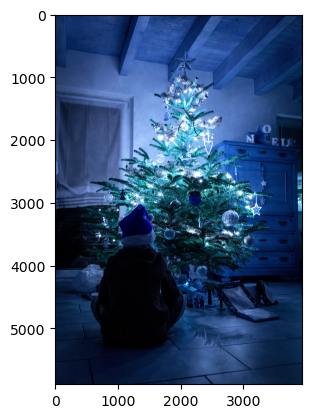

In [28]:
img = cv2.imread('s-b-vonlanthen-CMpmgBy833w-unsplash.jpg')
plt.imshow(img)

### 2. Convert it to RGB colors.

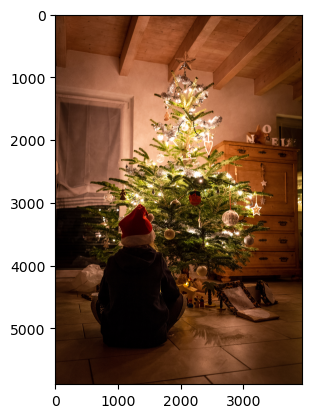

In [29]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

#### 3. Compress the image (hereinafter the compressed image) to the width of 1967 pixels, observing the ratio of the original image. Please note: do not round the sides ratio while calculating. If the height turns out to be a non integer value, then round the heigt value down to an integer. Use cv2.resize() with parameter interpolation = cv2.INTER_AREA.

#### Enter the ratio of the original image width to its height:
##### Round the answer to the nearest thousandths, but use the exact width value to calculate the height.

In [30]:
h, w, c = RGB_img.shape
new_width = 1967
k = float(w) / h
dim = (new_width, int(new_width / k))

In [31]:
resized_img = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)

In [32]:
round(k, 3)

0.668

#### Enter the height of the resulting compressed image:

In [34]:
resized_img.shape

(2946, 1967, 3)

#### 4. Plot a histogram of the compressed image in the RGB palette. Compare the intensity density estimation across the channels R, G and B.

#### Enter the highest density value among three channels:
##### Enter the result with an accuracy of 4 decimal places.

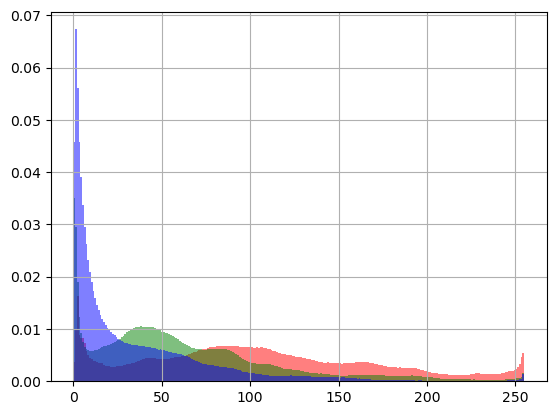

In [36]:
red_hist = plt.hist(resized_img[:, :, 0].ravel(), bins = 256, color = "Red", alpha = 0.5, density = True)
green_hist = plt.hist(resized_img[:, :, 1].ravel(), bins = 256, color = "Green", alpha = 0.5, density = True)
blue_hist = plt.hist(resized_img[:, :, 2].ravel(), bins = 256, color = "Blue", alpha = 0.5, density = True)
plt.grid()

In [42]:
max_density = max(max(red_hist[0]), max(green_hist[0]), max(blue_hist[0]))
print(round(max_density, 4))

0.0673
